In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df=pd.read_csv("/content/heart_disease.csv")
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1      1.5   
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   0       110   264    0        0      132      0      1.2   
299   68    1   3       144   193    1        0      141      0      3.4   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  target  
0        2   0     2       0  
1        1   3     1     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    2.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    0.600660    0.663366   
std      0.994971   22.8750

In [9]:
print(df.median())

age          56.0
sex           1.0
cp            2.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          1.0
target        0.0
dtype: float64


In [10]:
print(df.mode())

    age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  3.0     120.0   197  0.0      0.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   204  NaN      NaN      NaN    NaN      NaN   
2   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    0.0  0.0   1.0     0.0  
1    NaN  NaN   NaN     NaN  
2    NaN  NaN   NaN     NaN  


In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
df_cleaned = df.dropna()

In [7]:
print(df.duplicated().sum())

0


In [8]:
df_no_duplicates = df.drop_duplicates()

In [15]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Handle missing values
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
#StandardScaler
standard_scaler = StandardScaler()
standard_scaled = pd.DataFrame( standard_scaler.fit_transform(df[numerical_columns]),columns=numerical_columns)
print("\nStandard Scaled Data:")
print(standard_scaled.head())
#MinMaxScaler:
minmax_scaler = MinMaxScaler()
minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df[numerical_columns]),columns=numerical_columns)
print("\nMin-Max Scaled Data:")
print(minmax_scaled.head())


Standard Scaled Data:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal    target  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.176225 -0.920631  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.870759  1.086212  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.223208  1.086212  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.870759 -0.920631  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.870759 -0.920631  

Min-Max Scaled Data:
        age  sex        cp  trestbps      chol  fbs  restecg

In [17]:
#splitting for testing
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   29    1   1       130   204    0        2      202      0      0.0   
202   57    1   2       150   126    1        0      173      0      0.2   
196   69    1   0       160   234    1        2      131      0      0.1   
75    65    0   2       160   360    0        2      151      0      0.8   
176   52    1   3       108   233    1        0      147      0      0.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   54    1   1       192   283    0        2      195      0      0.0   
71    67    1   3       125   254    1        0      163      0      0.2   
106   59    1   3       140   177    0        0      162      1      0.0   
270   61    1   3       140   207    0        2      138      1      1.9   
102   57    0   3       128   303    0        2      159      0      0.0   

     slope  ca  thal  
132      0   0     1  
202      0   1     3  
196      1   1    

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_model.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[26  3]
 [ 5 27]]


In [21]:
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.89%


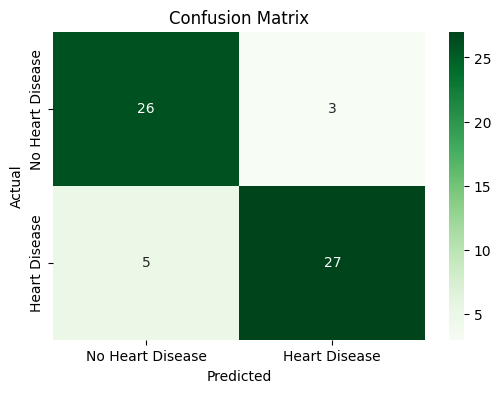

In [33]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
class_labels = ['No Heart Disease', 'Heart Disease']
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

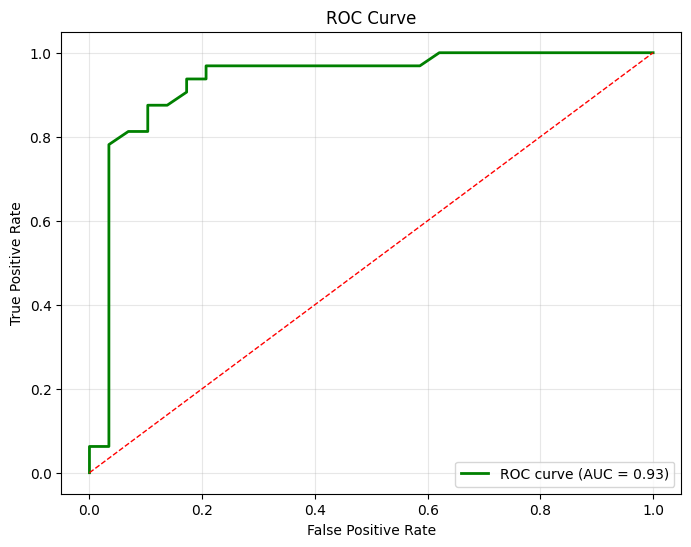

AUC Score: 0.93


In [34]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

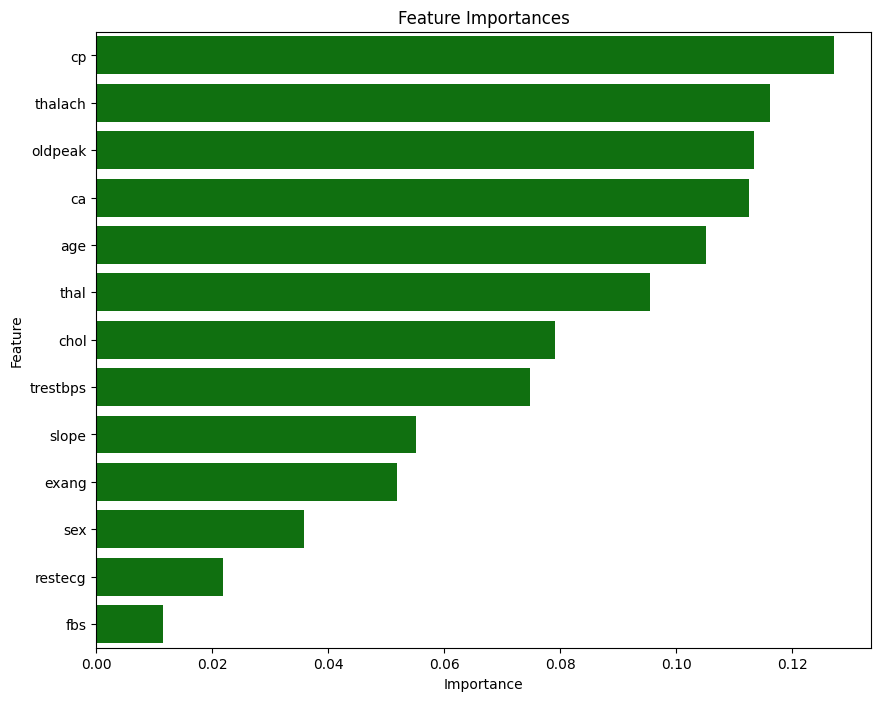

In [38]:
feature_importances = rf_model.feature_importances_
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
fi_df = fi_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=fi_df,color='green')
plt.title('Feature Importances')
plt.show()